### Este es un ejercicio hecho en vivo en la clase del 5 de Febrero del 2025 para la clase de inteligencia computacional

In [79]:
import pandas as pd
import numpy as np  
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [3]:
x,y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


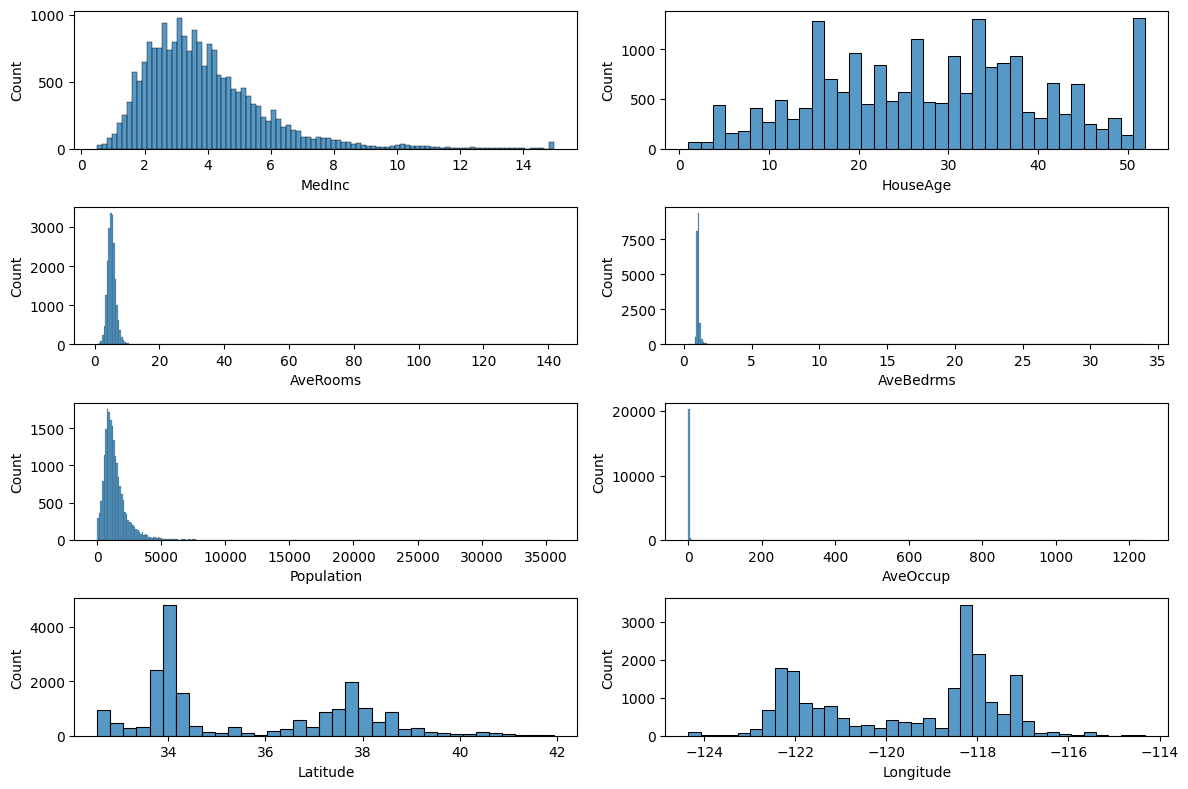

In [32]:
fig, ax = plt.subplots(4,2, figsize=(12,8))

for ax, col in zip(ax.ravel(), x.columns):
    sns.histplot(x[col], ax=ax)

fig.tight_layout()

<Axes: xlabel='Longitude', ylabel='Latitude'>

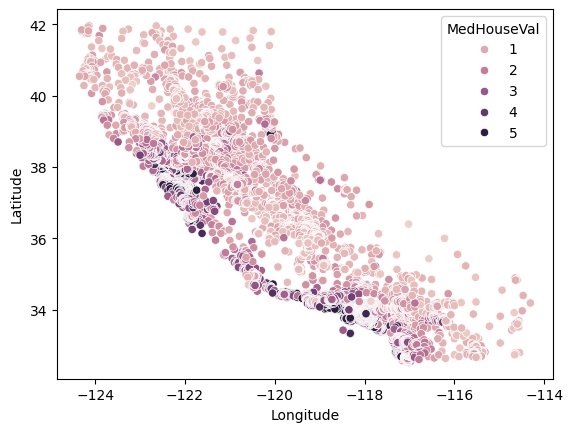

In [39]:
sns.scatterplot(x=x['Longitude'], y=x['Latitude'], hue=y)

<Axes: xlabel='MedHouseVal', ylabel='Count'>

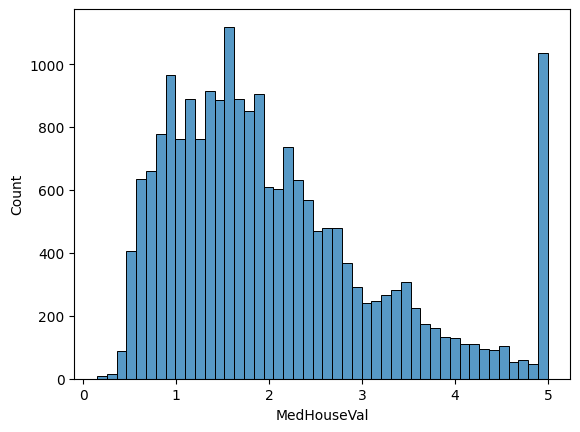

In [23]:
sns.histplot(y)

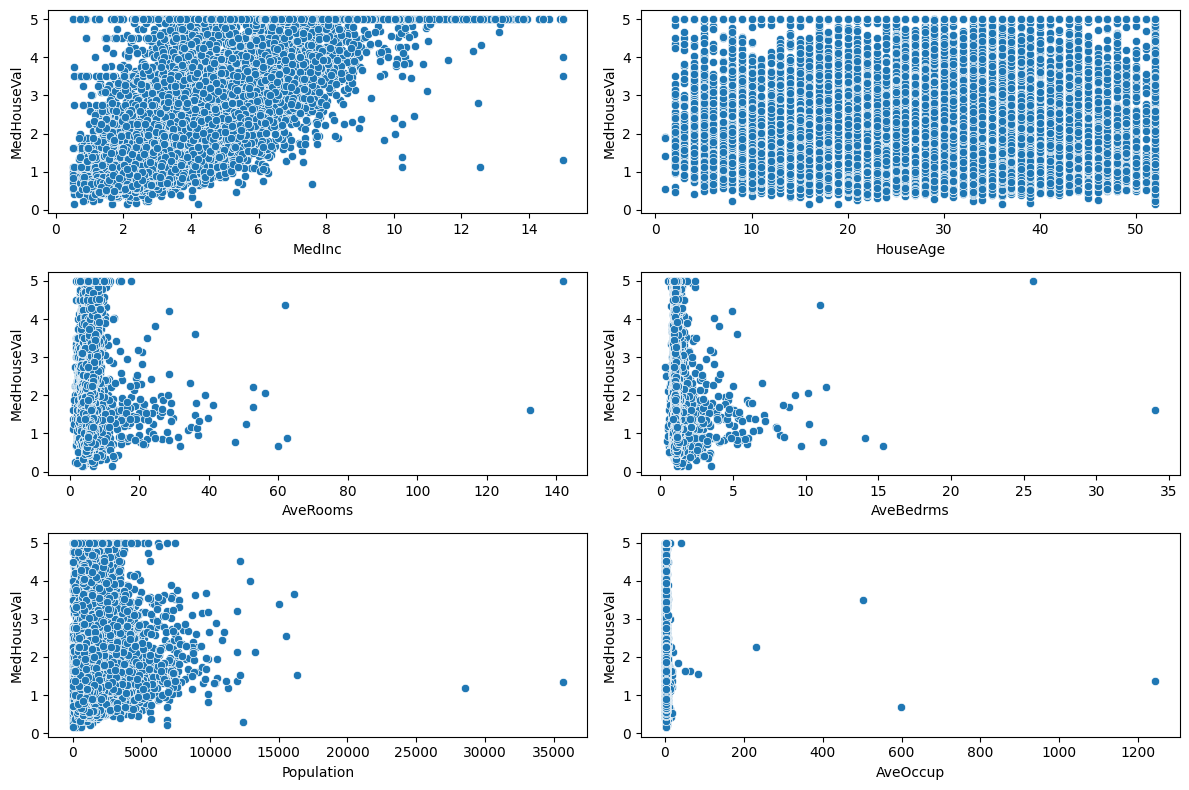

In [30]:
fig, axs = plt.subplots(3,2, figsize=(12,8))

cols= x.drop(['Latitude', 'Longitude'],axis=1)

for ax, col in zip(axs.ravel(), cols):
    sns.scatterplot(x=x[col], y=y, ax=ax)
fig.tight_layout()

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_testval, y_train, y_testval = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_testval,y_testval, test_size=0.5, random_state=42)


In [72]:
#utilizar IQR
Q1= x_train.quantile(0.25)
Q3= x_train.quantile(0.75)
IQR = Q3 - Q1

x_train_capped = x_train.copy()
x_test_capped = x_test.copy()
x_val_capped = x_val.copy()

for col in x_train.columns:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    x_train_capped[col] = x_train[col].clip(lower= lower_bound, upper = upper_bound)
    x_test_capped[col] = x_test[col].clip(lower= lower_bound, upper = upper_bound)
    x_val_capped[col] = x_val[col].clip(lower= lower_bound, upper = upper_bound)

x_train = x_train_capped
x_test = x_test_capped 
x_val = x_val_capped

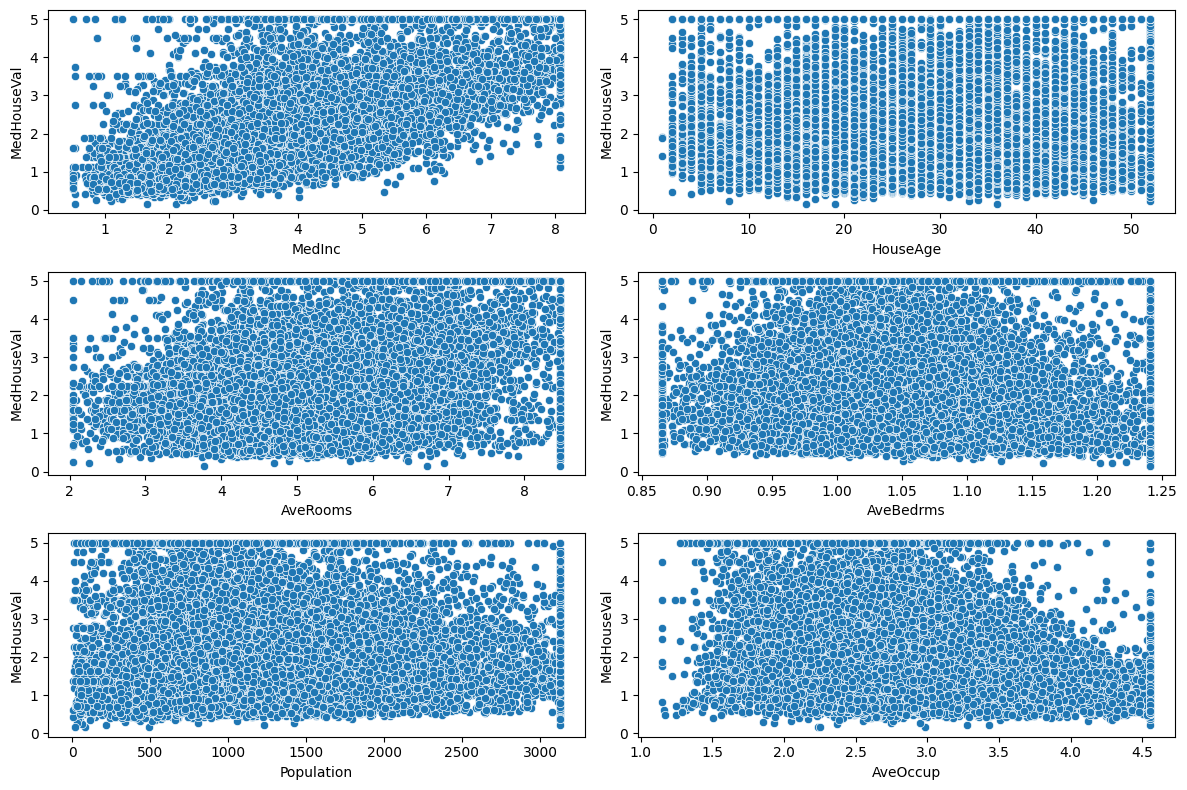

In [73]:
fig, axs = plt.subplots(3,2, figsize=(12,8))

cols= x.drop(['Latitude', 'Longitude'],axis=1)

for ax, col in zip(axs.ravel(), cols):
    sns.scatterplot(x=x_train[col], y=y, ax=ax)
fig.tight_layout()

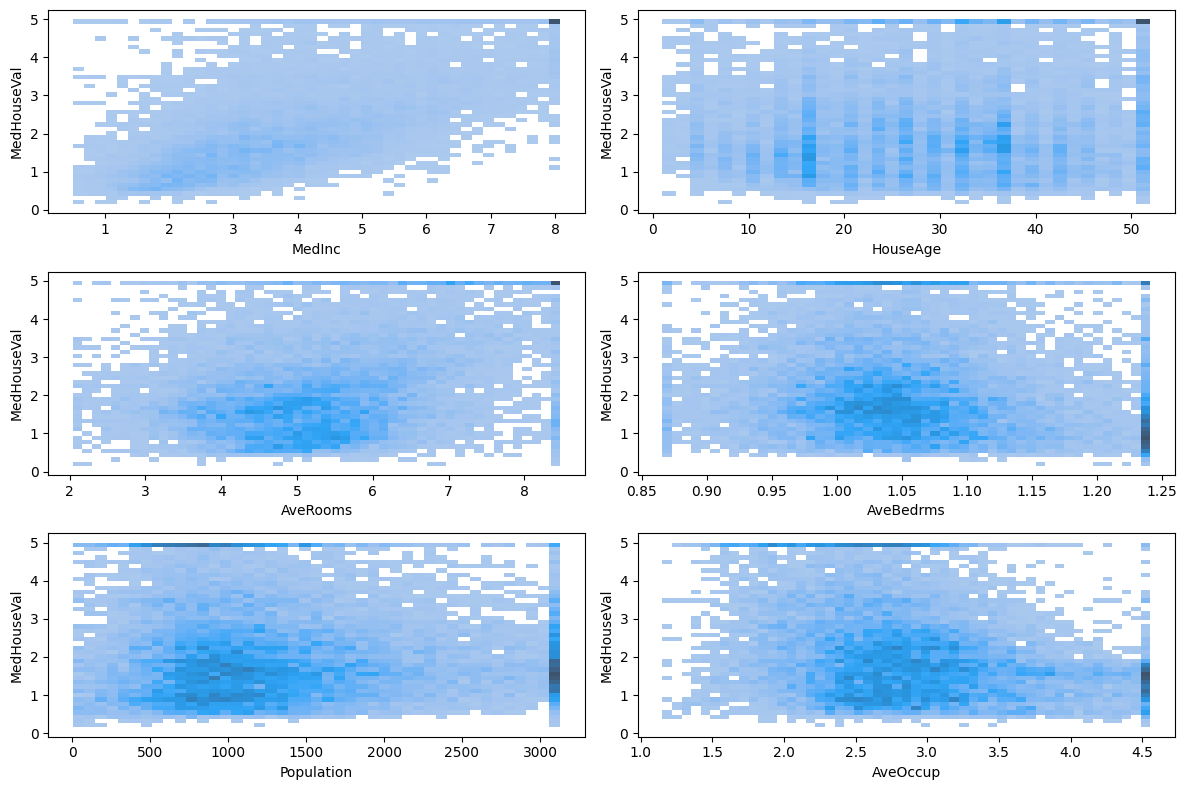

In [74]:
fig, axs = plt.subplots(3,2, figsize=(12,8))

cols= x.drop(['Latitude', 'Longitude'],axis=1)

for ax, col in zip(axs.ravel(), cols):
    sns.histplot(x=x_train[col], y=y, ax=ax)
fig.tight_layout()

In [ ]:
# Preprocesamiento de los datos ( normalizarlos )
MinMaxScaler(x_train)
MinMaxScaler(x_test)
MinMaxScaler(x_val)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.",MedInc...s x 8 columns]
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [ ]:
# Regresion Lineal

LR = LinearRegression()

LR.fit(x_train,y_train)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
# Funcion para evaluar modelo

def evaluate_model(model, x, y):
    y_pred = model.predict(x)


    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = root_mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    return { 'MAE': mae,
             'MSE': mse,
             'RMSE': rmse,
             'R2': r2   
            
            }

train_metrics = evaluate_model(LR, x_train, y_train)
val_metrics = evaluate_model(LR, x_val, y_val)

print(train_metrics)
print(val_metrics)

{'MAE': 0.4926798564542401, 'MSE': 0.4379354787299065, 'RMSE': 0.6617669368666785, 'R2': 0.6723948109958489}
{'MAE': 0.502495489728496, 'MSE': 0.45256409421221644, 'RMSE': 0.6727288415195356, 'R2': 0.652773320677844}
